지도 학습 : 회귀

### **5.1 1차원 입력 직선 모델**

나이와 키를 가진 16인분의 데이터.

목적은 데이터베이스에 없는 사람의 나이에 대해, 그 사람의 키를 예측하는 것이다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed = 1) # 난수를 고정
X_min = 4 # X의 하한
X_max = 30 # X의 상한
X_n = 16
X = 5 + 25*np.random.rand(X_n) # 16개의 0 ~ 1 사이의 수 발생 후 25를 곱하고 5를 더함.
Prm_c = [170, 108, 0.2] # 랜덤의 키 (height 생성)

T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min = X_min, X_max = X_max, X_n = X_n, T=T)

여기까지는 단순히 데이터를 만들어 낸 것 뿐 입니다. 데이터를 생성하는 법에 대해서는 이 챕터의 마지막에서 다루고있으니 넘어간다.

In [ ]:
print("X : \n{0:}\n".format(X))
print("np.random.rand(X_n) = \n{0:}".format(np.random.rand(X_n)))

X : 
[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]

np.random.rand(X_n) = 
[0.90853515 0.62336012 0.01582124 0.92943723 0.69089692 0.99732285
 0.17234051 0.13713575 0.93259546 0.69681816 0.06600017 0.75546305
 0.75387619 0.92302454 0.71152476 0.12427096]


In [ ]:
print(np.round(X,2)) # np round를 이용하여 소수점 아래 두자리까지만 표기

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [ ]:
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


X와 T를 그래프로 표시

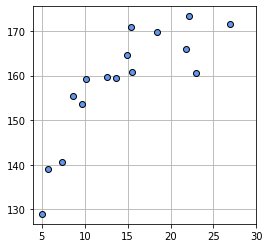

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(X, T, marker = 'o', linestyle = 'None', markeredgecolor = 'black', color = 'cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

여기서 직관적으로 직선을 그어본다면 새로운 나이 데이터에서 키를 대략적으로 예측은 가능하다.

직선 모델은 y(x) = w_0*x + w_1 식으로 쓴다.
w_0는 기울기를 나타내며 w_1은 절편을 의미한다.



---



### **5.1.2 제곱오차함수**

평균 제곱 오차 MSE = 직선과 데이터 점의 차의 제곱의 평균

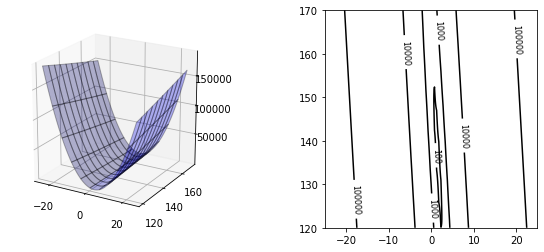

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
def mse_line(x, t, w):
    y = w[0] * x + w[1] # 직선 모델. w[0] = x0[i0], w[1] = x1[i1]
    mse = np.mean((y-t)**2) # 평균 제곱 오차
    return mse

xn = 100
w0_range = [-25, 25] # 범위는 50
w1_range = [120, 170] # 범위는 50
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1])) # w = (x0[i0], x1[i1])

plt.figure(figsize = (9.5, 4))
plt.subplots_adjust(wspace= 0.5) # subplot간의 간격 설정 wspace 가로 간격 hspace 세로 간격

ax = plt.subplot(1, 2, 1, projection = '3d')
ax.plot_surface(xx0, xx1, J, rstride = 10, cstride = 10, alpha = 0.3, color = 'blue', edgecolor = 'black') # plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
#rstride, stride는 각각 색의 변화율을 설정하는 것으로 기본은 1입니다. 더 큰 수일수록 색이 거칠게 바뀝니다. 또, alpha는 그려질 그래프의 알파값(투명도),  cmap는 그래프의 디자인 모양을 설정합니다
ax.set_xticks([-20, 0, 20]) # 축에서의 숫자 표시
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60) # view_init(elev = None, azim = None) elevation을 약자로 쓴 것으로 z plane의 각도를 의미하며 입력한 각도대로 위 아래로 변화. azimuth angle로 x, y 평면 각도를 의미함.

plt.subplot(1,2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors = 'black', levels = [100, 1000, 10000, 100000]) # contour 등치선 표현.  plt.contour( X , Y,  Z)
cont.clabel(fmt = '%1.0f', fontsize = 8)
plt.show()




---


### **5.1.3 매개 변수 구하기(경사하강법)**

J가 가장 작아지는 W0와 W1을 구하기 위한 방법.

w0와 w1에 대한 편미분을 통해

w(t+1) 을 구해본다.

In [ ]:
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1

# 시험삼아 w = [10, 165]의 기울기

d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


dmse_line을 사용한 경사하강법 fit_line_num의 구현

데이터 x,t를 인수로, mse_line을 최소화하는 w를 돌려준다.
w는 초기값 [10.0, 165.0] 에서 시작하여 dmse_line에서 구한 기울기 w를 갱신하고 있다.
갱신 단계의 폭이 되는 학습 비율은 0.001이다.

W이 평평한 곳에 도달하면  w의 갱신을 종료한다. 구체적으로는 기울기의 각 요소의 절대값이 eps(엡실론) 0.1보다 작으면 for loop에서 빠져나온다.



반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


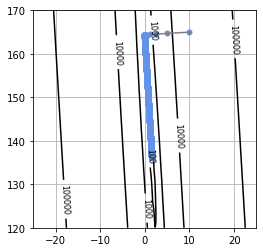

In [ ]:
def fit_line_num(x, t): # 데이터 x,t를 인수로, mse_line을 최소화하는 w를 돌려준다.
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # learning rate
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 #반복을 종료. 기울기의 절대값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i-1])
        w_i[i, 0] = w_i[ i -1 , 0] -alpha * dmse[0]
        w_i[i, 1] = w_i[i-1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: #종료 판정.
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

plt.figure(figsize=(4,4))
xn = 100 # 등고선 해상도
w0_range =[-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',levels = (100, 1000, 10000, 100000))
cont.clabel(fmt = '%1.0f', fontsize= 8)
plt.grid(True)

W0, W1, dMSE, W_history = fit_line_num(X, T)

print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-', color = 'gray', markersize = 10, markeredgecolor='cornflowerblue')
plt.show()

w0=1.540, w1 = 136.176
SD=7.002 cm


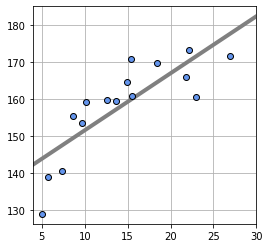

In [ ]:
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth = 4)

plt.figure(figsize=(4,4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1 = {1:.3f}".format(W0, W1)) # indexing. 문자열 formatting
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker = 'o', linestyle= 'None', color = 'cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

MSE는 49.03 였는데, 이는 말 그대로 오차를 제곱하고 있기 때문에, 직관적으로 
오차가 얼마나 되는지는 잘 알 수 없다. 따라서 제곱된 숫자를 제곱하기 이전으로 복원하는 제곱근을 취한다. 따라서 7.00cm의 수치를 갖게된다. 즉, 직선과 데이터의 차이는 대략 7.00cm라는 것이다.

이 평균 제곱 오차의 제곱근을 Standard deviation이라고 한다. 오차가 대략 7cm라는 의미를 제대로 말하자면 오차가 정규분포를 따른다고 가정했을 때, 전체의 68%의 데이터 점에서 오차가 7.00cm이하라는 의미이다.

이처럼 J의 기울기만 구할 수 있다면, 최소 제곱법으로 극소값을 구할 수 있다.

**주의할 점은 일반적으로 경사하강법으로 구해지는 해는 어디까지나 극솟값이며, 전체의 최솟값을 나타내지않는다.**
( Local minimum == Global minimum인 지점을 찾아야함. )



---



### **5.1.4 선형 모델 매개 변수의 해석해**

*해석해란?
경사하강법은 반복 계산을 통한 근사값을 구하는 과정. 이를 수치해라함.
직선 모델의 경우, 방정식을 해결하여 정확한 해를 구할 수 있음. 이러한 풀이를 해석해라함.

해석해를 사용한다면, 반복 계산이 아닌, 1회의 계산으로 최적의 w를 구할 수 있다.


목표는 J가 극소화되는 지점 w 찾기이다. ( cs231에서는 J = Gradient 라고 보면 될 듯 )

w0=1.558, w1=135.872
SD=7.001 cm


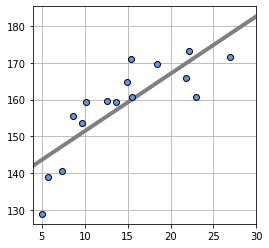

In [ ]:
def fit_line(x, t):
    mx = np.mean(x) # <x>
    mt = np.mean(t) # <t> 
    mtx = np.mean(t * x) #<tx>
    mxx = np.mean(x * x) # <x**2>
    w0 = (mtx - mt * mx ) / ( mxx - mx **2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])


W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X, T, marker = 'o', linestyle= 'None', color = 'cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


즉, 직선을 fitting한다면 해석해를 도출할 수 있으므로, 경사 하강법을 사용할 필요가 없다.
* 다만 해석해가 구해지지 않는 모델에서는 경사하강법을 사용해야한다.


---



### 5.2 2차원 모델

다음은 입력이 2차원인 경우, X = (x0, x1)에 확장한다.
1차원의 경우는 xn은 나이만을 의미했지만 이와 함께 몸무게 정보도 사용하여 키를 예측한다.

몸무게의 데이터를 인공적으로 만든다.
사람의 체질량 지수(BMI)가 평균 23이라고 가정하여 다음 식을 사용한다.

몸무게 = 23 * 키**2 / 100 + 노이즈

몸무게는 키의 제곱에 반비례한다는 단순 식이다.




In [ ]:
# 원래 나이 x를 x0로, 몸무게의 데이터를 x1으로 추가
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23 * ( T / 100 )**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [ ]:
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


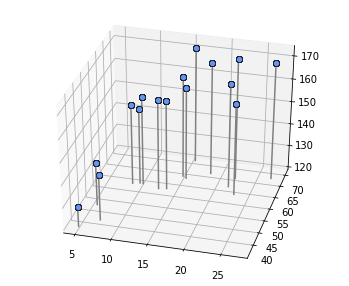

In [ ]:
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i],x1[i]], [120, t[i]], color = 'gray')
        ax.plot(x0, x1, t, 'o', color = 'cornflowerblue', markeredgecolor='black', markersize = 6, markeredgewidth = 0.5)
        ax.view_init(elev=35, azim=-75)

plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
show_data2(ax, X0, X1, T)
plt.show()



---



### 5.2.1 데이터의 표시 방법

데이터의 번호를 n, 요소의 번호를 m이라 설정한다.
단순 교재에서 설명을 하기 위한 설정


---



### **5.2.2 면 모델**

N개의 2차원 벡터 Xn에 대해, 각각 tn이 할당되어 있으므로, 이 관계를 보려면 3차원의 plot이 편리하다.
임의의 w에 대해 면을 그리는 함수 show_plane(ax, w)를 이용한다.

SD = 12.876 cm


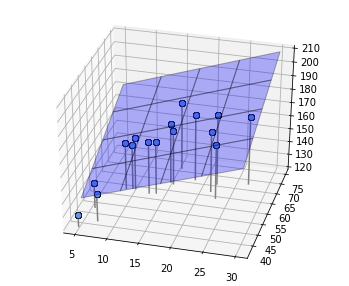

In [ ]:
def show_plane(ax, w): #면의 표시
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0] * px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color = 'blue', edgecolor = 'black')

def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # A
    mse = np.mean((y-t)**2)
    return mse

# main

plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection = '3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
plt.show()

이 면의 함수는 y(x) = w0x0 + w1x1 + w2 로 표현된다.

이 함수는 x0와 x1의 쌍에 대해 y를 결정할 수 있다. 이 때, 좌표 (x0, x1)에 대한 y의 높이, 즉 좌표 (x0, x1, y)에 점을 찍는 것을 고려하라. 이 작업을 여러 (x0, x1)의 쌍으로 반복하면 공간에 많은 점을 찍을 수 있다. 이 점의 집합이 '평평한 표면을 형성하는 '것이다.


---



### **5.2.3 매개변수의 해석해**

2차원의 경우에도 평균 제곱 오차를 구할 수 있다.

편미분에 대한 내용으로, 191페이지의 수식을 참고한다.



w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


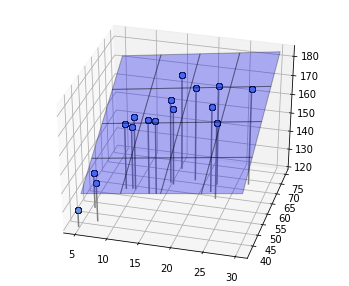

In [ ]:
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1 ) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1 ) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / ( c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2])

plt.figure(figsize = (6, 5))
ax = plt.subplot(1, 1, 1, projection = '3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()




---

### **5.3 D차원 선형 회귀 모델**

이제부터 x가 3차원, 4차원 그 이상인 D차원일 때 차원 수를 변수로한 공식을 고려해야한다.


---


### **5.3.1 D차원 선형 회귀 모델**

1차원 입력에선 직선 모델, 2차원 입력에선 면 모델 모두 선형 회귀 모델이라는 같은 종류의 모델이다. 일반적으로
y(x) = w_0x_0 + w_1x_1 + ... + w_d-1*x_d-1 + w_d 로 나타난다.

마지막 w_d는 절편을 나타내고 x가 곱해져있지 않은 점에 주의하라.

(만약 절편 w_d가 모델에 없다면 어떤 w에서도 원점을 대입하면 y = 0이 된다. 즉 모델은 어떤 w더라도 원점을 지나는 평면인 것이다.)


---
### **5.3.2 매개변수의 해석해**
x가 어떤 차원이더라도 모두 w = (x.T*x)^-1 x.T*t의 형태에서 최적의 w를 얻을 수 있다.
이 식의 우변에는 '무어-펜로즈' 의사 역행렬이라는 이름이 붙어있다. 역행렬은 가로와 세로의 길이가 같은 정사각형 행렬로 정의할 수 밖에 없었지만 의사 역행렬은 정방 행렬이 아닌 행렬(X)에서 정의할 수 있는 역행렬의 대체 버전으로 구성되어있다.



---







### **5.3.3 원점을 지나지 않는 면에 대한 확장**

페이지 199 쪽에서 간단하게 학습하면 된다.

---




# **5.4 선형 기저 함수 모델**
기존에 직선을 사용하여 예측했다. 하지만 곡선을 사용한다면 오차가 더 작아질 수 있다.

여기에서는 가우스 함수를 기저 함수로 선택한 성형 기저 함수 모델을 생각한다.

[가우스 함수](https://www.google.com/imgres?imgurl=https%3A%2F%2Fsteemitimages.com%2FDQmSCnGbdPBE5JXuxJSiXmJCeUZNayK2nCVC3S87puWS8vM%2F1.PNG&imgrefurl=https%3A%2F%2Fsteemit.com%2Fkr%2F%40hunhani%2F6yxyte-chapter-6&tbnid=9-ZhPkqmajm3RM&vet=12ahUKEwj_g4_8w8vxAhUJ_5QKHVloCdMQMygHegUIARC5AQ..i&docid=aPWK47Gwz_OdVM&w=429&h=135&q=%EA%B0%80%EC%9A%B0%EC%8A%A4%20%ED%95%A8%EC%88%98%20%EC%88%98%EC%8B%9D&ved=2ahUKEwj_g4_8w8vxAhUJ_5QKHVloCdMQMygHegUIARC5AQ)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

In [ ]:
def gauss(x, mu, s):
    return np.exp(-(x - mu) **2 / (2 * s**2))

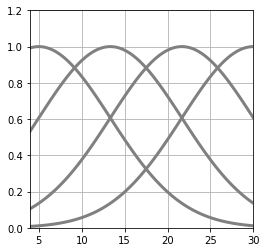

In [ ]:
M=4 # 4개의 가우스 함수 (M = 4)를 나이의 범위 5 ~ 30으로 일정 간격으로 배치한 것. s는 인접한 가우스 함수 중심 사이의 거리로 한다.   
plt.figure(figsize=(4,4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

이 것이 M = 4일 때의 선형 기저 함수 모델이다. 매개 변수 w를 개중치 매개 변수라하며 이 같은 계산을 가중치를 붙여 더한다고 표현하고있다. 마지막 W_4 즉, W_M은 곡선 상하의 평행이동을 ㅈ절하는 중요한 역할을 하지만, 다른 매개 변수와 달리 상수항으로서 위치한다. 따라서 다른 매개 변수와 취급이 다르다. 더미 기초 함수를 추가하면 식 5-66과 같이 나타난다.

In [ ]:
# 선형 기저 함수 모델
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y


In [ ]:
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y-t)**2)
    return mse
    

In [ ]:
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)

    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w


W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


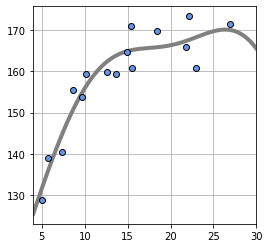

In [ ]:
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

# main
plt.figure(figsize=(4, 4))
M = 4
W= fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W=' + str(np.round(W, 1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


*참고



```
# 선형 기저 함수 모델
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y-t)**2)
    return mse

def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)

    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

```





---
### **5.5 오버피팅의 문제**

M을 충분히 크게하면 어떤 데이터에도 잘 적용이될까? 라는 의문에, 다양한 M을 넣어서 fitting을 시도해본다.


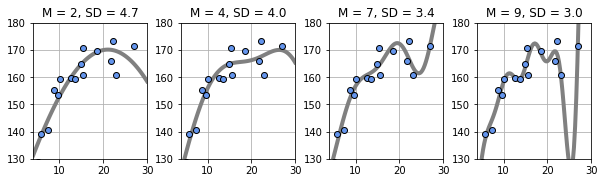

In [ ]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker = 'o', linestyle = 'None', color = 'cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)

    plt.title("M = {0:d}, SD = {1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

M = 2 ~ 9 일 때 SD를 계산한다.

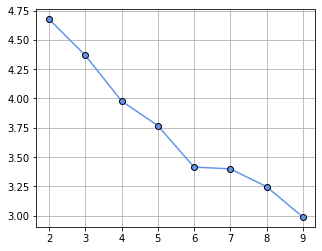

In [ ]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker = 'o', color = 'cornflowerblue', markeredgecolor ='black')
plt.grid(True)
plt.show()

M이 증가함에 따라 SD는 줄어든다. M이 증가할 수 록 ㅎ선형 기저 함수 모델은 작은 곡선도 표현할 수 있다. 따라서 곡선은 데이터 점에 근접하게 되고 오차(SD)는 점점 감소한다.

데이터의 오차는 작아져도, 새 데이터의 예측은 확실히 나빠진다. 이를 과적합 ( overfitting )
이라고 한다.

최적의 M은 어떻게 찾아야 하는가? 새 데이터에 대한 예측의 정확도를 생각해야함.

CS231 강의에서 배웠던 내용을 토대로, train, val, test set으로 나눈 것을 생각하자.

훈련에 이용하지 않은 미지의 데이터에 대한 예측 오차로 M을 평가하는 방법을 Hold out 검증이라한다.
4분의 1 비율로 테스트 데이터 비율을 정해 fitting 해보자.

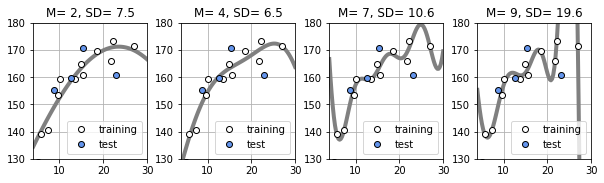

In [ ]:
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]
plt.figure(figsize = ( 10, 2.5))

plt.subplots_adjust(wspace=0.3)
M = [2,4,7,9]
for i in range(len(M)):
    plt.subplot(1, len(M), i+1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o', linestyle = 'None', color='white', markeredgecolor='black', label = 'training')
    plt.plot(X_test, T_test, marker = 'o', linestyle='None', color = 'cornflowerblue', markeredgecolor = 'black', label = 'test')
    plt.legend(loc = 'lower right', fontsize = 10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M= {0:d}, SD= {1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

test 데이터에 대해서는 점점 벗어난다.
그렇다면, 경향을 정량적으로 보기 위해 M을 2부터 9까지 하나씩 이동하여, 훈련 데이터와 테스트 데이터의 오차를 보자.

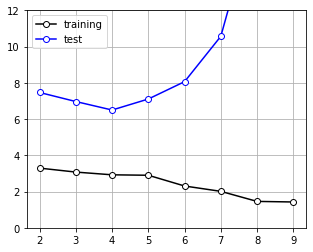

In [ ]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker = 'o', linestyle = '-', markerfacecolor= 'white', markeredgecolor = 'black', color = 'black', label = 'training')
plt.plot(M, mse_test, marker = 'o', linestyle = '-', markerfacecolor= 'white', markeredgecolor = 'blue', color = 'blue', label = 'test')
plt.legend(loc='upper left', fontsize = 10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()

그림으로 나타난 결과를 보면, M이 늘어나면 train set의 오차는 평이하게 감소하지만, Test data의 오차는 M=4까지 내려간 뒤 M = 5 부터 증가한다.

즉 M = 5에서 과적합이 일어나고 있다고 볼 수 있다. 결과적으로 이번 홀드 아웃 검증에선 M = 4 일 때,
가장 데이터에 적합하다.
<br>
<br>
하지만 데이터의 분류법에 따라 홀드 아웃의 결과는 달라진다.
즉, 분류법에 따라 최적의 M의 값이 달라지는데, 분류법 간 차이를 최대한으로 줄이는
Cross validation방법을 사용한다. 데이터를 분할하는 종류의 개수로 K겹 교차 검증 
K - hold cross validation이라고 부른다. ***그림 5-20 참고***


먼저 데이터 X와 t를 K개로 분할하여 첫번째 데이터를 테스트 데이터로, 나머지를 훈련 데이터로 설정한다. 훈련 데이터로부터 모델 M의 매개 변수를 구하고 이 매개 변수를 사용하여 테스트 데이터에서 평균 제곱 오차를 계산한다. 마찬가지로 두 번째 데이터를 테스트 데이터로 삼고 같은 과정을 반복한다. K회 반복하고 마지막에 K개의 MSE의 평균을 계산하여 이 숫자를 이 M의 평가값으로 정한다.

최대 분할 수 는 K = N이다.

우선 데이터를 K 분할하여 각각의 평균 제곱 오차를 출력하는 함수의 코드이다.


In [ ]:
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n),k) != i] # (A)
        t_train = t[np.fmod(range(n), k) != i] # (A)
        x_test = x[np.fmod(range(n), k) == i] # (A)
        t_test = t[np.fmod(range(n), k) == i] # (A)
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

참고 - np.fmod(n, k)는 n을 k로 나눈 나머지를 반환한다.
이 때, n을 range(n)을 주면, 0부터 k-1까지 반복하는 n개의 리스트를 얻을 수 있다.
예를 들어,


In [ ]:
np.fmod(range(10), 5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

이제 M = 4, K = 4의 값으로 kfold_gauss_func의 값을 보면,

In [ ]:
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

윗 부분이 각각의 분할에서 훈련 데이터의 평균 제곱 오차이며, 아랫 부분이 테스트 데이터에서 평균 제곱 오차이다.
분할 수를 최대 16으로 하고 2에서 7까지의 N으로 오차의 평균을 계산하여 나타내면 다음과 같다.

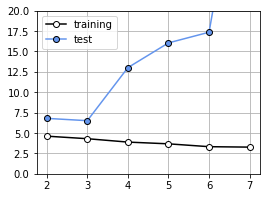

In [ ]:
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] = kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis = 0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis = 0))

plt.figure(figsize = (4, 3))
plt.plot(M, mean_Gauss_train, marker = 'o', linestyle = '-', color = 'black', markerfacecolor='w', label= 'training')
plt.plot(M, mean_Gauss_test, marker = 'o', linestyle = '-', color = 'cornflowerblue', markeredgecolor='black', label = 'test')
plt.legend(loc = 'upper left', fontsize = 10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

M = 3 일 때, 테스트 데이터의 오차가 가장 작은 것을 알 수 있다. 즉 LOOCV 검증에서는 M = 3이 적합하다는 결론이다. 홀드 아웃 검증과는 조금 다르지만, 그보다 신뢰할 수 있는 결과라고 한다.

교차 검증은 M을 구하기 위한 방법이며, 모델 매개 변수 w를 구하는 용도가 아니다. M = 3 이 최적임을 알았으므로 그 모델의 매개 변수 w를 모든 데이터를 사용하여 마지막으로 계산한다. 이 매개 변수 w를 사용한 곡선으로, 미지수의 입력 데이터 x에 대한 예측 y를 출력하면 될 것이다.

SD = 4.37 cm


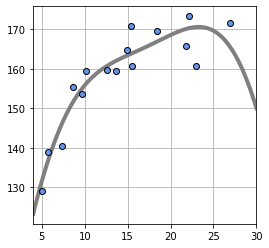

In [ ]:
M = 3
plt.figure(figsize=(4,4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker = 'o', linestyle = 'None', color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD = {0:.2f} cm".format(np.sqrt(mse)))
plt.show()

이번 테스트 데이터 ( N = 16 ) 처럼 데이터 수가 적은 경우에는 교차 검증이 유용하다. 그러나 데이터 수가 많으면 교차 검증은 계산에 시간이 많이 걸린다. 이 경우엔 홀드 아웃 검증을 사용하면 좋다.
데이터 수가 크면 홀드 아웃 검증 결과와 교차 검증의 결과가 비슷해진다.



---

### **5.6 새로운 모델의 생성**

선형 기저 함수 모델을 도입하여 데이터와의 오차를 많이 줄였다. 하지만 아직 문제는 해결되지않았다.
25세부터 그래프가 급격히 하강한다는 점이다. 이것은 30세 주위의 데이터가 불충분하기 때문인데, '키는 나이가 들면서 점차 커지고 일정한 곳에서 수렴한다'는 지식을 모델에 추가해주어야한다.
<br><br><br>
식 5-71을 참고하면,
w0, w1, w2는 모두 양의 값을 취하는 매개 변수이다. 이 함수를 모델 A라 칭한다.
x가 증가하면 exp(-w2x)는 0에 접근하고 그 결과 1항의 w0만 값을 갖는다. 즉, x가 증가하면 y 는 w0에 가까워진다. w0는 수렴하는 값을 결정하는 매개 변수가 된다.
<br><br><br>
이제 평균 제곱 오차 J가 최소가 되는 w0, w1, w2를 구해야하는데 식 5-72를 참고한다.
지금까지 경사 하강법을 사용하여 수치적으로 w를 구하는 방법과 해석해를 이용한 도출법을 알아보았다.
여기서는 전자의 수치 해석에서 배운 scipy 라이브러리를 이용한다.


In [ ]:
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y

def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw = 4)

def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y-t)**2)
    return mse

In [ ]:
from scipy.optimize import minimize

def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args = (x, t), method = "powell")
    return res1.x


첫 번째 줄에서 최적화 라이브러리의 minimize를 호출한다. 


```
    res1 = minimize(mse_model_A, w_init, args(x, t), method = "powell")

```
첫 번째 인수는 최소화할 목표 함수이며, 두 번째 인수는 w의 초기값, 세 번째 인수는 목표함수 mse_model_A(w, x, t)를 최적화하는 매개 변수 w 이외의 인수인 x, t이다. 옵션값으로 method를 powell로 지정하여 구배를 사용하지 않는 최적화 방법인 파웰 알고리즘을 지정한다.
파웰 알고리즘은 최소화 함수를 사용할 때, 늦게 수렴되거나 수렴이 보장되지 않는 경우 실험적으로 사용하는 알고리즘이라한다.


w0 = 169.0, w1 = 113.7, w2 = 0.2
SD = 3.86 cm


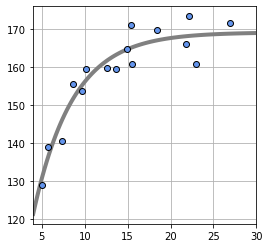

In [ ]:
#main
plt.figure(figsize = (4, 4))
W_init = [100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0 = {0:.1f}, w1 = {1:.1f}, w2 = {2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker = 'o', linestyle = 'None', color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD = {0:.2f} cm".format(np.sqrt(mse)))
plt.show()



---
### **5.7 모델의 선택**

모델 간의 비교를 하기 위해서 '미지의 데이터에 대한 예측 정확도로 평가한다'는 사고 방식이 유효하다. 즉, 홀드 아웃 검증과 교차 검증 모델로 모델의 좋고 나쁨을 평가할 수 있다.

다음 모델 A의 LOOCV를 실시하고 선형 기저 함수 모델과 비교해본다.



Gauss(M=3) SD = 6.51 cm
Model A SD = 4.72 cm


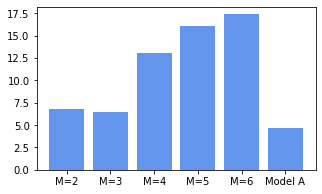

In [ ]:
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test

# main

K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD = {0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD = {0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label = label, align="center", facecolor ="cornflowerblue")
plt.show()

결과는 선형 기저 함수 모델보다 모델 A 쪽이 데이터에 잘 어울린다고 볼 수 있다.




---



<br><br><br>
### **5.8 정리**




1.   데이터의 준비
2.   목적 함수의 결정
3.   모델의 후보 결정
4.   데이터를 train, test set으로 나눈다.
5.   훈련 데이터로부터 모델의 최적 매개 변수를 결정
6.   새로운 데이터 x에 대한 예측 정확도에 따라, 최적 모델을 선택



